In [1]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
%matplotlib inline
### imports ###
import sys
import os
import re
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

# set plotting functions
matplotlib.rcParams['savefig.dpi'] = 300
sns.set(font_scale=1)
sns.set_context('talk')
sns.set_style('ticks')
# get matplotlib to save readable fonts
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# import custom functions
sys.path.insert(0, '/home/h1bennet/code/')
from homer_preprocessing import import_homer_diffgene, read_homer_gene_exp
from plotting_scripts import plot_exp_rpkm, gene_list_bar_plot

In [2]:
workingDirectory = '/home/h1bennet/strains_rna/results/A00_Strains_Control_WholeLiver_RNA/'
dataDirectory = '/home/h1bennet/strains/data/RNA/control_wholeliver/'
if not os.path.isdir(workingDirectory):
    os.mkdir(workingDirectory)
os.chdir(workingDirectory)

Goal is easy visualization of gene expression across hepatic cell types.

In [3]:
tpm = pd.read_csv(
    '/gpfs/data01/glasslab/home/h1bennet/strains_rna/results/A00_Strains_Control_WholeLiver_RNA/expression/rawT.txt',
    index_col=0,
    sep='\t')

In [4]:
# Kupffer
kc_groups = [[0,1],
             [2,3],
             [4,5]]

kc_group_labels = ['C57BL/6J Kupffer Control young',
                   'Balb/cJ Kupffer Control young',
                   'AJ Kupffer Control young']

kc_colors = ['#74c476', '#6baed6', '#de2d26']

# Hepatocyte
hep_groups = [[6,7,8],
              [9,10],
              [11,12]]

hep_group_labels = ['C57BL/6J Hepatocyte Control young',
                    'Balb/cJ Hepatocyte Control young',
                    'AJ Hepatocyte Control young']

hep_colors = ['#74c476', '#6baed6', '#de2d26']

# LSEC
lsec_groups = [[13,14,15,16],
               [17,18,19,20],
               [21,22,23,24]]

lsec_group_labels = ['C57BL/6J LSEC Control young',
                     'Balb/cJ LSEC Control young',
                     'AJ LSEC Control young']

lsec_colors = ['#74c476', '#6baed6', '#de2d26']

# Stellate
stel_groups = [[25,26,27],
               [28,29,30,31],
               [32,33,34,35]]

stel_group_labels = ['C57BL/6J Stellate Control young',
                     'Balb/cJ Stellate Control young',
                     'AJ Stellate Control young',]

stel_colors = ['#74c476', '#de2d26', '#6baed6']

Make legend

In [5]:
strain_labels = ['C57BL6/J', 'BALB/cJ', 'AJ']
strain_colors = ['#74c476', '#6baed6', '#de2d26']

In [6]:
legend_elements = []
for lab, col in  zip(strain_labels, strain_colors):
    legend_elements.append(Patch(label=lab, color=col))

In [16]:
tpm.index[tpm.index.str.contains('Socs')]

Index(['Socs6', 'Socs1', 'Socs4', 'Socs2', 'Socs3', 'Socs7', 'Socs5'], dtype='object')

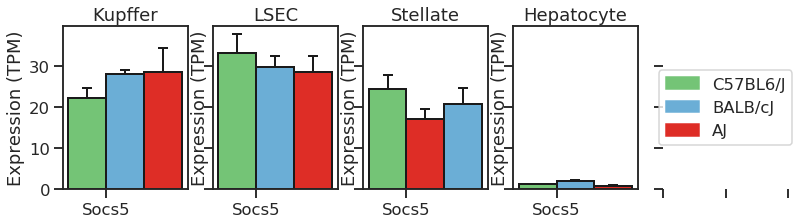

In [22]:
gene = 'Socs5'

fig, axs = plt.subplots(1, 5,
                       figsize=(13, 3),
                       sharey=True)
plt.subplots_adjust(wspace=0.2)

for group, label, color, ax in zip([kc_groups,lsec_groups,stel_groups,hep_groups],
                                   [kc_group_labels,lsec_group_labels,stel_group_labels,hep_group_labels],
                                   [kc_colors,lsec_colors,stel_colors,hep_colors],
                                   axs.flatten()[:4]):

    gene_list_bar_plot([gene],
                       tpm,
                       groups=group,
                       group_labels = label,
                       colors = color,
                       width=0.2, 
                       ax=ax)
    ax.set_title(label[0].split(' ')[1])

    ax.get_legend().remove()

axs[4].legend(handles=legend_elements, loc='center');
axs[4].spines['top'].set_visible(False);
axs[4].spines['right'].set_visible(False);
axs[4].spines['left'].set_visible(False);
axs[4].spines['bottom'].set_visible(False);
axs[4].set_xticklabels('');
# axs[4].set_yticklabels('')

# Make mega heatmap

In [30]:
if not os.path.isdir('./gene_lists/'):
    os.mkdir('./gene_lists')

In [32]:
strains = ['aj', 'balbc', 'c57']
cells = ['hepatocyte', 'kupffer', 'lsec', 'stellate']
log2fc = 1
padj = 0.05
gene_list_dict ={}

In [33]:
for strain in strains:
    for cell in cells:
        strain_cell = strain+'_'+cell
        # initialize gene lists
        g_intersect = set()
        g_union = set()
        for i in glob.glob('./differential/'+strain_cell+'*homer.txt'):
            print(i)
            # read in gene expression data
            df, tpm, tpm_mat, tpm_mat_quant = import_homer_diffgene(
                depath=i,
                gepath='./expression/HOMER.rawTPM.txt',
                gene_name_index=True)

            # select differential genes
            df = df.loc[~(df.chr.str.contains('chrX|chrY|ChrUn')), :]
            sig_genes = df.index[(df['padj'] < padj) & (df['log2FoldChange'] <= -log2fc)].to_list()

            # add to sets
            if len(g_union) == 0:
                g_union = set(sig_genes)
                g_intersect = set(sig_genes)
            else:
                g_union = g_union.union(sig_genes)
                g_intersect = g_intersect.intersection(sig_genes)

            # print('union set length:', print(len(g_union)))
            # print('intersection set length:', print(len(g_intersect)))

        # after getting union and intersection sets add to dict
        gene_list_dict[strain_cell+'_union'] = list(g_union)
        gene_list_dict[strain_cell+'_intersection'] = list(g_intersect)
        

./differential/aj_hepatocyte_control_young.vs.balbc_hepatocyte_control_young.scatter.homer.txt
ge all transcripts (24940, 43)
Diff Gene selected transcripts (5501, 14)
ge selected transcripts (5501, 43)
./differential/aj_hepatocyte_control_young.vs.c57_hepatocyte_control_young.scatter.homer.txt
ge all transcripts (24940, 43)
Diff Gene selected transcripts (5494, 14)
ge selected transcripts (5494, 43)
./differential/aj_kupffer_control_young.vs.c57_kupffer_control_young.scatter.homer.txt
ge all transcripts (24940, 43)
Diff Gene selected transcripts (7652, 14)
ge selected transcripts (7652, 43)
./differential/aj_kupffer_control_young.vs.balbc_kupffer_control_young.scatter.homer.txt
ge all transcripts (24940, 43)
Diff Gene selected transcripts (7612, 14)
ge selected transcripts (7612, 43)
./differential/aj_lsec_control_young.vs.balbc_lsec_control_young.scatter.homer.txt
ge all transcripts (24940, 43)
Diff Gene selected transcripts (8926, 14)
ge selected transcripts (8926, 43)
./differentia

# Heatmap of ligand expression

In [34]:
if not os.path.isdir('./figures/'):
    os.mkdir('./figures')

Read in nichenet ligands

In [35]:
ligands = pd.read_csv('/home/h1bennet/data/gene_lists/nichenet_ligands.txt',
                      sep='\t')['x'].str.capitalize().tolist()
ligands[:5]

['Cxcl1', 'Cxcl2', 'Cxcl3', 'Cxcl5', 'Ppbp']

Read in expression values

In [36]:
tpm_mat = pd.read_csv('./expression/rawT.txt', sep='\t', index_col=0)

pull average expression

In [37]:
avg_tpm_dict = {}
for strain in strains:
    for cell in cells:
        strain_cell = strain+'_'+cell
        avg = tpm_mat.loc[:, tpm_mat.columns.str.contains(strain_cell)].mean(1)
        avg_tpm_dict[strain_cell] = avg

In [38]:
avg_tpm_df = pd.DataFrame(avg_tpm_dict)

In [39]:
avg_tpm_df.columns

Index(['aj_hepatocyte', 'aj_kupffer', 'aj_lsec', 'aj_stellate',
       'balbc_hepatocyte', 'balbc_kupffer', 'balbc_lsec', 'balbc_stellate',
       'c57_hepatocyte', 'c57_kupffer', 'c57_lsec', 'c57_stellate'],
      dtype='object')

set order manually

In [40]:
reorder_cols = ['aj_hepatocyte', 'balbc_hepatocyte', 'c57_hepatocyte',
                'aj_kupffer','balbc_kupffer','c57_kupffer',
                'aj_lsec','balbc_lsec','c57_lsec',
                'aj_stellate','balbc_stellate','c57_stellate']

In [41]:
avg_tpm_df = avg_tpm_df.loc[:, reorder_cols]

In [50]:
avg_tpm_df.to_csv('./hepatic_cells_average_tpm.txt',
                  sep='\t')

## Intersection ligands

In [42]:
act = []
for key in gene_list_dict.keys():
    if ('intersection' in key) and ('kupffer' not in key):
        act.extend(gene_list_dict[key])

act = set(act)
# overlap with ligands
act_ligands = act.intersection(ligands)
print(len(act), 'activated genes')
print(len(act_ligands), 'activated ligands')

524 activated genes
16 activated ligands


In [43]:
avg_tpm_df.loc[act_ligands, ~avg_tpm_df.columns.str.contains('kupffer')].to_csv(
    './intersection_niche_ligands.txt',
    sep='\t')

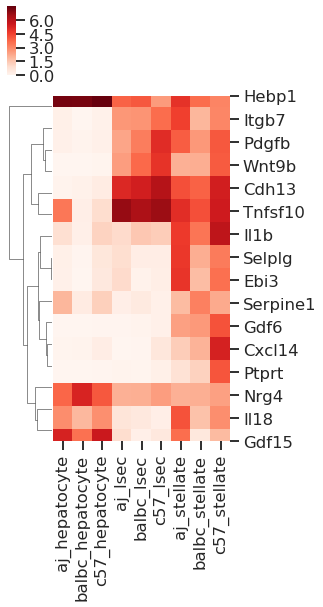

In [44]:
sns.clustermap(
    np.log2(avg_tpm_df.loc[act_ligands, ~avg_tpm_df.columns.str.contains('kupffer')]+1),
    col_cluster=False,
    #z_score=0,
    cmap='Reds',
    #vmin=-2,
    #vmax=8,
    figsize=(4,8),
    yticklabels=1)

plt.savefig('./figures/diff_genes_intersection_ligands_clustermap.png', bbox_inches='tight')
# plt.close()

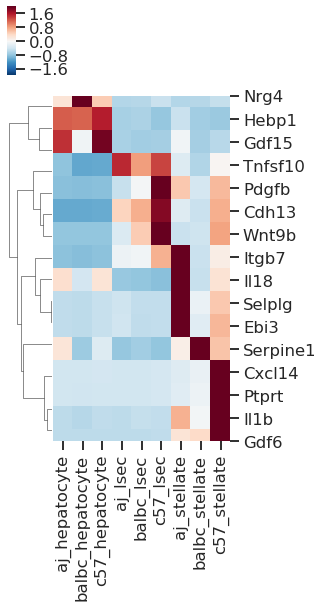

In [45]:
sns.clustermap(
    avg_tpm_df.loc[act_ligands, ~avg_tpm_df.columns.str.contains('kupffer')]+1,
    col_cluster=False,
    z_score=0,
    cmap='RdBu_r',
    vmin=-2,
    vmax=2,
    figsize=(4,8),
    yticklabels=1)

plt.savefig('./figures/diff_genes_intersection_ligands_clustermap_zscore.png', bbox_inches='tight')
# plt.close()

# Union gene set

In [46]:
act = []
for key in gene_list_dict.keys():
    if ('union' in key) and ('kupffer' not in key):
        act.extend(gene_list_dict[key])

act = set(act)
# overlap with ligands
act_ligands = act.intersection(ligands)
print(len(act), 'activated genes')
print(len(act_ligands), 'activated ligands')

1931 activated genes
88 activated ligands


Write to data frame

In [47]:
avg_tpm_df.loc[act_ligands, ~avg_tpm_df.columns.str.contains('kupffer')].to_csv(
    './union_niche_ligands.txt',
    sep='\t')

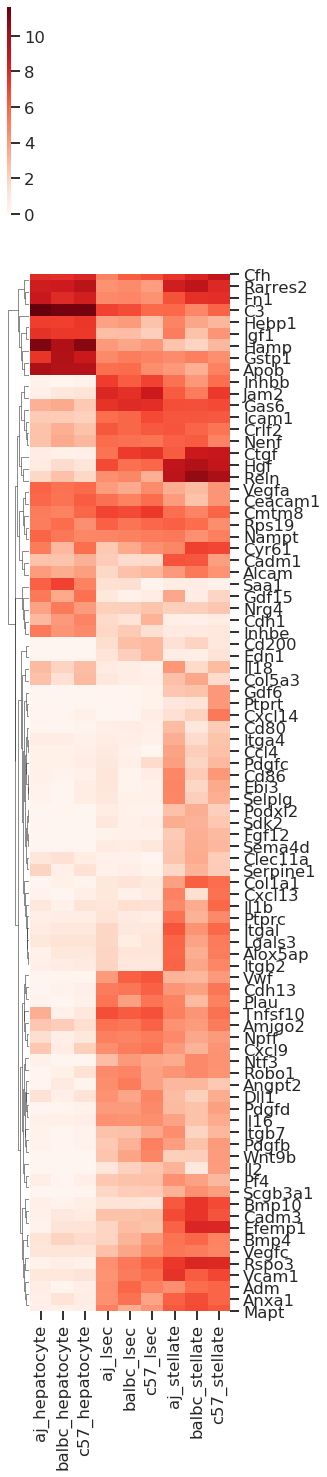

In [48]:
sns.clustermap(
    np.log2(avg_tpm_df.loc[act_ligands, ~avg_tpm_df.columns.str.contains('kupffer')]+1),
    col_cluster=False,
    cmap='Reds',
    #vmin=-2,
    #vmax=8,
    figsize=(4,24),
    yticklabels=1)

plt.savefig('./figures/diff_genes_union_ligands_clustermap.png', bbox_inches='tight')
# plt.close()

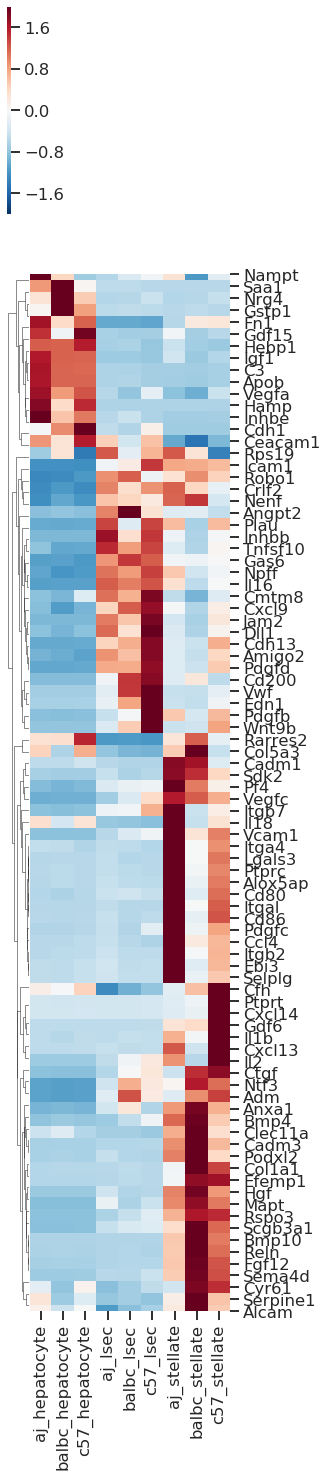

In [49]:
sns.clustermap(
    avg_tpm_df.loc[act_ligands, ~avg_tpm_df.columns.str.contains('kupffer')],
    col_cluster=False,
    z_score=0,
    cmap='RdBu_r',
    vmin=-2,
    vmax=2,
    figsize=(4,24),
    yticklabels=1)

plt.savefig('./figures/diff_genes_union_ligands_clustermap_zscore.png', bbox_inches='tight')
# plt.close()